In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# load files
file_to_load = "movie_budget.csv"
inflation = "inflation.csv"
oscars= 'the_oscar_award(version 2).csv'


In [2]:
# Read Purchasing File and store into Pandas data frame
raw_data = pd.read_csv(file_to_load)
raw_data

,movie_id,title,year,trivia,mpaa,release_date,run_time,distributor,director,writer,...,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4,html
0,tt0099088,Back to the Future Part III,1990,"Stranded in 1955, Marty McFly learns about the...",NaN,25-May,1 hr 58 min,Universal Pictures,Robert Zemeckis,Robert Zemeckis,...,Thomas F. Wilson,40000000,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,https://www.boxofficemojo.com/title/tt0099088/...
1,tt0099165,The Bonfire of the Vanities,1990,"After his mistress runs over a young teen, a W...",R,22-Dec,2 hr 5 min,Warner Bros.,Brian De Palma,Michael Cristofer,...,Kim Cattrall,47000000,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0099165/...
2,tt0099348,Dances with Wolves,1990,"Lieutenant John Dunbar, assigned to a remote w...",NaN,9-Nov,3 hr 1 min,Orion Pictures,Kevin Costner,Michael Blake,...,Rodney A. Grant,22000000,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN,https://www.boxofficemojo.com/title/tt0099348/...
3,tt0099422,Dick Tracy,1990,The comic strip detective finds his life vastl...,NaN,15-Jun,1 hr 45 min,Walt Disney Studios Motion Pictures,Warren Beatty,Chester Gould,...,Charlie Korsmo,47000000,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music,https://www.boxofficemojo.com/title/tt0099422/...
4,tt0099423,Die Hard 2,1990,John McClane attempts to avert disaster as rog...,NaN,6-Jul,2 hr 4 min,Twentieth Century Fox,Renny Harlin,Walter Wager,...,Reginald VelJohnson,70000000,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN,https://www.boxofficemojo.com/title/tt0099423/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,tt8772262,Midsommar,2019,A couple travels to Sweden to visit a rural ho...,R,3-Jul,2 hr 28 min,A24,Ari Aster,Ari Aster,...,William Jackson Harper,9000000,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller,https://www.boxofficemojo.com/title/tt8772262/...
3239,tt8946378,Knives Out,2019,A detective investigates the death of a patria...,PG-13,21-Nov,2 hr 11 min,Lionsgate,Rian Johnson,Rian Johnson,...,Jamie Lee Curtis,40000000,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery,https://www.boxofficemojo.com/title/tt8946378/...
3240,tt9024106,Unplanned,2019,All Abby Johnson ever wanted to do was help wo...,R,29-Mar,1 hr 49 min,Pure Flix Entertainment,Chuck Konzelman,Abby Johnson,...,Jared Lotz,6000000,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN,https://www.boxofficemojo.com/title/tt9024106/...
3241,tt9134216,Playing with Fire,2019,A crew of rugged firefighters meet their match...,PG,7-Nov,1 hr 36 min,Paramount Pictures,Andy Fickman,Dan Ewen,...,Tyler Mane,29900000,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN,https://www.boxofficemojo.com/title/tt9134216/...


In [3]:
clean_data = raw_data[['title', 'year', 'release_date', 'mpaa', 'director', 'writer', 'composer', 'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget','domestic', 'international', 'worldwide', 'genre_1', 'genre_2', 'genre_3', 'genre_4']]
clean_data                    

,title,year,release_date,mpaa,director,writer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,Back to the Future Part III,1990,25-May,NaN,Robert Zemeckis,Robert Zemeckis,Alan Silvestri,Dean Cundey,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,40000000,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,The Bonfire of the Vanities,1990,22-Dec,R,Brian De Palma,Michael Cristofer,Dave Grusin,Vilmos Zsigmond,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,Dances with Wolves,1990,9-Nov,NaN,Kevin Costner,Michael Blake,John Barry,Dean Semler,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,22000000,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,Dick Tracy,1990,15-Jun,NaN,Warren Beatty,Chester Gould,Danny Elfman,Vittorio Storaro,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,47000000,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,Die Hard 2,1990,6-Jul,NaN,Renny Harlin,Walter Wager,Michael Kamen,Oliver Wood,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,70000000,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,Midsommar,2019,3-Jul,R,Ari Aster,Ari Aster,The Haxan Cloak,Pawel Pogorzelski,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,9000000,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,Knives Out,2019,21-Nov,PG-13,Rian Johnson,Rian Johnson,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,40000000,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,Unplanned,2019,29-Mar,R,Chuck Konzelman,Abby Johnson,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,6000000,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,Playing with Fire,2019,7-Nov,PG,Andy Fickman,Dan Ewen,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,John Leguizamo,Tyler Mane,29900000,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN


In [4]:
movie_data = clean_data.dropna(subset=['worldwide'])
movie_data

,title,year,release_date,mpaa,director,writer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,Back to the Future Part III,1990,25-May,NaN,Robert Zemeckis,Robert Zemeckis,Alan Silvestri,Dean Cundey,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,40000000,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,The Bonfire of the Vanities,1990,22-Dec,R,Brian De Palma,Michael Cristofer,Dave Grusin,Vilmos Zsigmond,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,Dances with Wolves,1990,9-Nov,NaN,Kevin Costner,Michael Blake,John Barry,Dean Semler,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,22000000,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,Dick Tracy,1990,15-Jun,NaN,Warren Beatty,Chester Gould,Danny Elfman,Vittorio Storaro,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,47000000,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,Die Hard 2,1990,6-Jul,NaN,Renny Harlin,Walter Wager,Michael Kamen,Oliver Wood,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,70000000,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,Midsommar,2019,3-Jul,R,Ari Aster,Ari Aster,The Haxan Cloak,Pawel Pogorzelski,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,9000000,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,Knives Out,2019,21-Nov,PG-13,Rian Johnson,Rian Johnson,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,40000000,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,Unplanned,2019,29-Mar,R,Chuck Konzelman,Abby Johnson,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,6000000,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,Playing with Fire,2019,7-Nov,PG,Andy Fickman,Dan Ewen,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,John Leguizamo,Tyler Mane,29900000,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN


In [5]:
inflation_mult = pd.read_csv(inflation)
inflation_mult

inflation_mult["Multiplier"]=inflation_mult["Multiplier"] +1
inflation_mult

,year,Multiplier
0,1990,1.98
1,1991,1.90
2,1992,1.84
3,1993,1.79
4,1994,1.75
5,1995,1.70
6,1996,1.65
7,1997,1.61
8,1998,1.59
9,1999,1.55


In [6]:
#inflation_clean = inflation_mult.dropna(axis=1)
#inflation_clean

inflation_clean = inflation_mult[["year", "Multiplier"]]
inflation_clean

inflation_cleaner = inflation_clean.dropna()
inflation_cleaner



#inflation_cleaner - use tonumeric, if it's a string that can't be converted, use string.replace to replace a pe

,year,Multiplier
0,1990,1.98
1,1991,1.90
2,1992,1.84
3,1993,1.79
4,1994,1.75
5,1995,1.70
6,1996,1.65
7,1997,1.61
8,1998,1.59
9,1999,1.55


In [7]:
#empty lists
titles = []

budgets = []
adjusted_budgets = []

domestics = []
adjusted_domestics = []

internationals = []
adjusted_internationals = []

worldwides = []
adjusted_worldwides = []

#budget
i = 0

for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for budget in year_movie['budget']:
        adjusted_budget=budget*inflation_cleaner.iloc[i,1]
        budgets.append(budget)
        adjusted_budgets.append(adjusted_budget)
    i+=1
#domestic
i = 0

for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for domestic in year_movie['domestic']:
        adjusted_domestic=domestic*inflation_cleaner.iloc[i,1]
        domestics.append(domestic)
        adjusted_domestics.append(adjusted_domestic)
    i+=1
#international
i=0

for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for international in year_movie['international']:
        adjusted_international=international*inflation_cleaner.iloc[i,1]
        internationals.append(international)
        adjusted_internationals.append(adjusted_international)
    i+=1

#worldwide
i=0 
for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for worldwide in year_movie['worldwide']:
        adjusted_worldwide=worldwide*inflation_cleaner.iloc[i,1]
        worldwides.append(worldwide)
        adjusted_worldwides.append(adjusted_worldwide)
    i+=1
i=0
for year in inflation_cleaner["year"]:
    year_movie = movie_data.loc[movie_data["year"] == year,:]
    for title in year_movie['title']:
        titles.append(title)
        

#if movie_data.loc["year"] in inflation_cleaner.loc["year"]
       # multiplier = inflation_cleaner[row.loc["year"]]
            #print(year_movie[f'{movie}'])
print(adjusted_worldwides)

[487365615.0, 31068560.16, 839933519.04, 322222677.48, 475689917.34, 406034.64, 1001502819.9, 270796802.76, 19097971.2, 944584965.72, 397015033.14, 399876222.24, 48056968.08, 5861774.16, 7732488.06, 917544410.64, 399892511.7, 517409483.58, 2431653.84, 27716690.799999997, 363854609.4, 5445240.399999999, 836224925.8, 29574189.7, 109305233.0, 340164202.9, 2555528.5, 2266817.8, 10538971.299999999, 8747465.1, 10357126.1, 44084643.6, 66256862.699999996, 14125979.399999999, 571624163.6999999, 344082711.59999996, 36933412.199999996, 32714352.0, 83377095.8, 7794799.399999999, 55124576.5, 7129613.199999999, 23664059.2, 113030618.1, 165167780.9, 90486270.7, 16111606.7, 75379005.89999999, 11906579.9, 5334922.6, 741938425.1999999, 88737706.39999999, 8377723.199999999, 18170446.7, 218695.69999999998, 518232379.59999996, 332498109.5, 20901639.7, 149447944.7, 989681209.3, 86326129.5, 8917148.4, 66107004.0, 59559592.599999994, 5197888.899999999, 1784626.2999999998, 1663.36, 1943016.0799999998, 13232174

In [8]:
adjusted_df = pd.DataFrame({"title":titles, 
                             "Adjusted Budget":adjusted_budgets, 
                             "Adjusted Domestic":adjusted_domestics, 
                             "Adjusted International":adjusted_internationals, 
                             "Adjusted Worldwide":adjusted_worldwides})
adjusted_df


,title,Adjusted Budget,Adjusted Domestic,Adjusted International,Adjusted Worldwide
0,Back to the Future Part III,79200000.0,1.747896e+08,3.125760e+08,4.873656e+08
1,The Bonfire of the Vanities,93060000.0,3.106856e+07,NaN,3.106856e+07
2,Dances with Wolves,43560000.0,3.647335e+08,4.752000e+08,8.399335e+08
3,Dick Tracy,93060000.0,2.054027e+08,1.168200e+08,3.222227e+08
4,Die Hard 2,138600000.0,2.327311e+08,2.429588e+08,4.756899e+08
...,...,...,...,...,...
3217,Queen & Slim,18180000.0,4.424639e+07,3.718060e+06,4.796445e+07
3218,Midsommar,9090000.0,2.770062e+07,1.965858e+07,4.735920e+07
3219,Knives Out,40400000.0,1.670169e+08,1.453083e+08,3.123251e+08
3220,Unplanned,6060000.0,1.919516e+07,2.067274e+06,2.126243e+07


In [9]:
#if loc["year"] = 1990:
#if the value of the year column = the key of the inflation multiplier dictionary, then multiply the value in column ""
#budget" "domestic", "international", "worldwide" by the value in the dictionary

#other option: instead of having a multiplier column, create a dictionary of inflation 
#use loc to locate (one is index) to locate specific values in a column 
#for loop if 

#for row in movie_data:
  # if row.loc["year"] in inflation_cleaner.loc["year"]
       # multiplier = inflation_cleaner[row.loc["year"]]

In [10]:
movie_data

,title,year,release_date,mpaa,director,writer,composer,cinematographer,main_actor_1,main_actor_2,main_actor_3,main_actor_4,budget,domestic,international,worldwide,genre_1,genre_2,genre_3,genre_4
0,Back to the Future Part III,1990,25-May,NaN,Robert Zemeckis,Robert Zemeckis,Alan Silvestri,Dean Cundey,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,40000000,88277583.0,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western
1,The Bonfire of the Vanities,1990,22-Dec,R,Brian De Palma,Michael Cristofer,Dave Grusin,Vilmos Zsigmond,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,47000000,15691192.0,NaN,15691192.0,Comedy,Drama,Romance,NaN
2,Dances with Wolves,1990,9-Nov,NaN,Kevin Costner,Michael Blake,John Barry,Dean Semler,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,22000000,184208848.0,240000000.0,424208848.0,Adventure,Drama,Western,NaN
3,Dick Tracy,1990,15-Jun,NaN,Warren Beatty,Chester Gould,Danny Elfman,Vittorio Storaro,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,47000000,103738726.0,59000000.0,162738726.0,Action,Comedy,Crime,Music
4,Die Hard 2,1990,6-Jul,NaN,Renny Harlin,Walter Wager,Michael Kamen,Oliver Wood,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,70000000,117540947.0,122706486.0,240247433.0,Action,Thriller,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,Midsommar,2019,3-Jul,R,Ari Aster,Ari Aster,The Haxan Cloak,Pawel Pogorzelski,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,9000000,27426361.0,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller
3239,Knives Out,2019,21-Nov,PG-13,Rian Johnson,Rian Johnson,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,40000000,165363234.0,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery
3240,Unplanned,2019,29-Mar,R,Chuck Konzelman,Abby Johnson,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,6000000,19005109.0,2046806.0,21051915.0,Biography,Drama,NaN,NaN
3241,Playing with Fire,2019,7-Nov,PG,Andy Fickman,Dan Ewen,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,John Leguizamo,Tyler Mane,29900000,44451847.0,24179822.0,68631669.0,Comedy,Family,NaN,NaN


In [11]:
adjusted_df = pd.merge(movie_data, adjusted_df, on="title")
adjusted_df

,title,year,release_date,mpaa,director,writer,composer,cinematographer,main_actor_1,main_actor_2,...,international,worldwide,genre_1,genre_2,genre_3,genre_4,Adjusted Budget,Adjusted Domestic,Adjusted International,Adjusted Worldwide
0,Back to the Future Part III,1990,25-May,NaN,Robert Zemeckis,Robert Zemeckis,Alan Silvestri,Dean Cundey,Michael J. Fox,Christopher Lloyd,...,157866667.0,246144250.0,Adventure,Comedy,Sci-Fi,Western,79200000.0,1.747896e+08,3.125760e+08,4.873656e+08
1,The Bonfire of the Vanities,1990,22-Dec,R,Brian De Palma,Michael Cristofer,Dave Grusin,Vilmos Zsigmond,Tom Hanks,Bruce Willis,...,NaN,15691192.0,Comedy,Drama,Romance,NaN,93060000.0,3.106856e+07,NaN,3.106856e+07
2,Dances with Wolves,1990,9-Nov,NaN,Kevin Costner,Michael Blake,John Barry,Dean Semler,Kevin Costner,Mary McDonnell,...,240000000.0,424208848.0,Adventure,Drama,Western,NaN,43560000.0,3.647335e+08,4.752000e+08,8.399335e+08
3,Dick Tracy,1990,15-Jun,NaN,Warren Beatty,Chester Gould,Danny Elfman,Vittorio Storaro,Warren Beatty,Madonna,...,59000000.0,162738726.0,Action,Comedy,Crime,Music,93060000.0,2.054027e+08,1.168200e+08,3.222227e+08
4,Die Hard 2,1990,6-Jul,NaN,Renny Harlin,Walter Wager,Michael Kamen,Oliver Wood,Bruce Willis,William Atherton,...,122706486.0,240247433.0,Action,Thriller,NaN,NaN,138600000.0,2.327311e+08,2.429588e+08,4.756899e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,Queen & Slim,2019,27-Nov,R,Melina Matsoukas,Lena Waithe,NaN,Tat Radcliffe,Daniel Kaluuya,Jodie Turner-Smith,...,3681248.0,47489558.0,Crime,Drama,Romance,NaN,18180000.0,4.424639e+07,3.718060e+06,4.796445e+07
3273,Midsommar,2019,3-Jul,R,Ari Aster,Ari Aster,The Haxan Cloak,Pawel Pogorzelski,Florence Pugh,Jack Reynor,...,19463936.0,46890297.0,Drama,Horror,Mystery,Thriller,9090000.0,2.770062e+07,1.965858e+07,4.735920e+07
3274,Knives Out,2019,21-Nov,PG-13,Rian Johnson,Rian Johnson,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,...,143869563.0,309232797.0,Comedy,Crime,Drama,Mystery,40400000.0,1.670169e+08,1.453083e+08,3.123251e+08
3275,Unplanned,2019,29-Mar,R,Chuck Konzelman,Abby Johnson,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,...,2046806.0,21051915.0,Biography,Drama,NaN,NaN,6060000.0,1.919516e+07,2.067274e+06,2.126243e+07


In [12]:
#change the 
movies_df = adjusted_df[['year','title','director','writer','mpaa','main_actor_1','main_actor_2','main_actor_3','main_actor_4','genre_1','genre_2','genre_3','genre_4','Adjusted Worldwide', 'Adjusted Domestic', 'Adjusted International', 'Adjusted Budget']]
movies_df

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,genre_2,genre_3,genre_4,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget
0,1990,Back to the Future Part III,Robert Zemeckis,Robert Zemeckis,NaN,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,Adventure,Comedy,Sci-Fi,Western,4.873656e+08,1.747896e+08,3.125760e+08,79200000.0
1,1990,The Bonfire of the Vanities,Brian De Palma,Michael Cristofer,R,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,Comedy,Drama,Romance,NaN,3.106856e+07,3.106856e+07,NaN,93060000.0
2,1990,Dances with Wolves,Kevin Costner,Michael Blake,NaN,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,Adventure,Drama,Western,NaN,8.399335e+08,3.647335e+08,4.752000e+08,43560000.0
3,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,Comedy,Crime,Music,3.222227e+08,2.054027e+08,1.168200e+08,93060000.0
4,1990,Die Hard 2,Renny Harlin,Walter Wager,NaN,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,Action,Thriller,NaN,NaN,4.756899e+08,2.327311e+08,2.429588e+08,138600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,2019,Queen & Slim,Melina Matsoukas,Lena Waithe,R,Daniel Kaluuya,Jodie Turner-Smith,Bokeem Woodbine,Chloë Sevigny,Crime,Drama,Romance,NaN,4.796445e+07,4.424639e+07,3.718060e+06,18180000.0
3273,2019,Midsommar,Ari Aster,Ari Aster,R,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,Drama,Horror,Mystery,Thriller,4.735920e+07,2.770062e+07,1.965858e+07,9090000.0
3274,2019,Knives Out,Rian Johnson,Rian Johnson,PG-13,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,Comedy,Crime,Drama,Mystery,3.123251e+08,1.670169e+08,1.453083e+08,40400000.0
3275,2019,Unplanned,Chuck Konzelman,Abby Johnson,R,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,Biography,Drama,NaN,NaN,2.126243e+07,1.919516e+07,2.067274e+06,6060000.0


In [13]:
pd.options.display.float_format = '${:,.1f}'.format
movies_df

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,genre_2,genre_3,genre_4,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget
0,1990,Back to the Future Part III,Robert Zemeckis,Robert Zemeckis,NaN,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,Adventure,Comedy,Sci-Fi,Western,"$487,365,615.0","$174,789,614.3","$312,576,000.7","$79,200,000.0"
1,1990,The Bonfire of the Vanities,Brian De Palma,Michael Cristofer,R,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,Comedy,Drama,Romance,NaN,"$31,068,560.2","$31,068,560.2",NaN,"$93,060,000.0"
2,1990,Dances with Wolves,Kevin Costner,Michael Blake,NaN,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,Adventure,Drama,Western,NaN,"$839,933,519.0","$364,733,519.0","$475,200,000.0","$43,560,000.0"
3,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,Comedy,Crime,Music,"$322,222,677.5","$205,402,677.5","$116,820,000.0","$93,060,000.0"
4,1990,Die Hard 2,Renny Harlin,Walter Wager,NaN,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,Action,Thriller,NaN,NaN,"$475,689,917.3","$232,731,075.1","$242,958,842.3","$138,600,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,2019,Queen & Slim,Melina Matsoukas,Lena Waithe,R,Daniel Kaluuya,Jodie Turner-Smith,Bokeem Woodbine,Chloë Sevigny,Crime,Drama,Romance,NaN,"$47,964,453.6","$44,246,393.1","$3,718,060.5","$18,180,000.0"
3273,2019,Midsommar,Ari Aster,Ari Aster,R,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,Drama,Horror,Mystery,Thriller,"$47,359,200.0","$27,700,624.6","$19,658,575.4","$9,090,000.0"
3274,2019,Knives Out,Rian Johnson,Rian Johnson,PG-13,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,Comedy,Crime,Drama,Mystery,"$312,325,125.0","$167,016,866.3","$145,308,258.6","$40,400,000.0"
3275,2019,Unplanned,Chuck Konzelman,Abby Johnson,R,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,Biography,Drama,NaN,NaN,"$21,262,434.1","$19,195,160.1","$2,067,274.1","$6,060,000.0"


In [14]:
movies_df.sort_values(by='Adjusted Worldwide', ascending=False)
movies_df

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,genre_2,genre_3,genre_4,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget
0,1990,Back to the Future Part III,Robert Zemeckis,Robert Zemeckis,NaN,Michael J. Fox,Christopher Lloyd,Mary Steenburgen,Thomas F. Wilson,Adventure,Comedy,Sci-Fi,Western,"$487,365,615.0","$174,789,614.3","$312,576,000.7","$79,200,000.0"
1,1990,The Bonfire of the Vanities,Brian De Palma,Michael Cristofer,R,Tom Hanks,Bruce Willis,Melanie Griffith,Kim Cattrall,Comedy,Drama,Romance,NaN,"$31,068,560.2","$31,068,560.2",NaN,"$93,060,000.0"
2,1990,Dances with Wolves,Kevin Costner,Michael Blake,NaN,Kevin Costner,Mary McDonnell,Graham Greene,Rodney A. Grant,Adventure,Drama,Western,NaN,"$839,933,519.0","$364,733,519.0","$475,200,000.0","$43,560,000.0"
3,1990,Dick Tracy,Warren Beatty,Chester Gould,NaN,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,Comedy,Crime,Music,"$322,222,677.5","$205,402,677.5","$116,820,000.0","$93,060,000.0"
4,1990,Die Hard 2,Renny Harlin,Walter Wager,NaN,Bruce Willis,William Atherton,Bonnie Bedelia,Reginald VelJohnson,Action,Thriller,NaN,NaN,"$475,689,917.3","$232,731,075.1","$242,958,842.3","$138,600,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,2019,Queen & Slim,Melina Matsoukas,Lena Waithe,R,Daniel Kaluuya,Jodie Turner-Smith,Bokeem Woodbine,Chloë Sevigny,Crime,Drama,Romance,NaN,"$47,964,453.6","$44,246,393.1","$3,718,060.5","$18,180,000.0"
3273,2019,Midsommar,Ari Aster,Ari Aster,R,Florence Pugh,Jack Reynor,Vilhelm Blomgren,William Jackson Harper,Drama,Horror,Mystery,Thriller,"$47,359,200.0","$27,700,624.6","$19,658,575.4","$9,090,000.0"
3274,2019,Knives Out,Rian Johnson,Rian Johnson,PG-13,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,Comedy,Crime,Drama,Mystery,"$312,325,125.0","$167,016,866.3","$145,308,258.6","$40,400,000.0"
3275,2019,Unplanned,Chuck Konzelman,Abby Johnson,R,Ashley Bratcher,Brooks Ryan,Robia Scott,Jared Lotz,Biography,Drama,NaN,NaN,"$21,262,434.1","$19,195,160.1","$2,067,274.1","$6,060,000.0"


In [15]:
movies_df.to_csv('movies_adjusted.csv')

In [16]:
#
genre = movies_df.groupby("genre_1")
sumgenre = genre.sum()
genre_df = pd.DataFrame(sumgenre)
genre_df.reset_index()

,genre_1,year,Adjusted Worldwide,Adjusted Domestic,Adjusted International,Adjusted Budget
0,Action,1903287,"$261,706,492,533.7","$106,007,969,571.1","$155,698,522,960.2","$90,803,800,000.0"
1,Adventure,636431,"$106,750,982,580.4","$41,978,926,496.6","$64,772,056,078.2","$29,108,920,000.0"
2,Animation,64214,"$10,183,261,185.2","$4,717,912,384.4","$5,465,348,800.8","$2,377,982,500.0"
3,Biography,365469,"$18,561,922,308.0","$9,671,962,154.4","$8,889,960,153.6","$7,064,853,910.2"
4,Comedy,1742346,"$88,929,530,300.1","$50,818,555,844.5","$38,110,974,455.6","$33,283,069,110.1"
5,Crime,417088,"$19,944,834,588.8","$9,977,806,729.3","$9,967,027,859.5","$7,762,793,840.0"
6,Documentary,36140,"$870,464,401.7","$435,100,873.0","$435,363,528.7","$204,756,007.0"
7,Drama,1027217,"$51,404,239,958.3","$24,444,895,181.5","$26,959,344,776.8","$18,845,385,250.0"
8,Family,8031,"$2,199,720,602.8","$968,352,694.8","$1,231,367,908.0","$271,660,000.0"
9,Fantasy,20029,"$1,451,251,398.9","$782,476,177.2","$668,775,221.7","$573,460,000.0"


In [17]:
genre2 = movies_df.groupby("genre_2").sum()
genre3 = movies_df.groupby("genre_3").sum()
genre4 = movies_df.groupby("genre_4").sum()
genre4["Adjusted Worldwide"]=genre4["Adjusted Worldwide"]/1000000000

In [18]:
add1 = genre_df.add(genre2, fill_value=0)
add2 = add1.add(genre3, fill_value=0) 
add3 = add2.add(genre4, fill_value=0)
add3["Adjusted Worldwide"]=add3["Adjusted Worldwide"]/1000000000

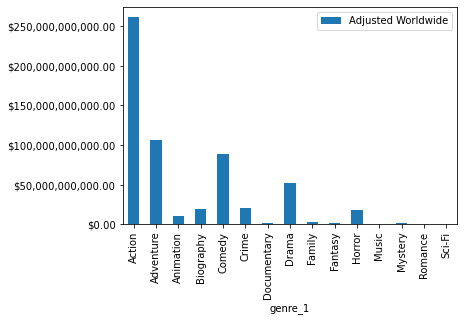

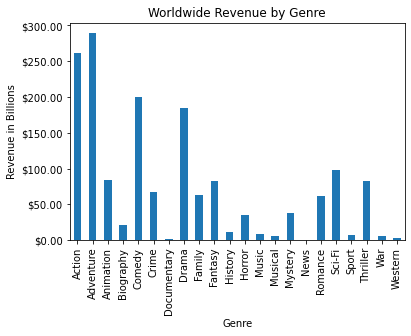

In [19]:
bar_chart = genre_df.plot.bar(y="Adjusted Worldwide")
bar_chart2 = add3.plot.bar(y="Adjusted Worldwide", legend=None)
bar_chart.yaxis.set_major_formatter('${x:1,.2f}')
bar_chart2.yaxis.set_major_formatter('${x:1,.2f}')
plt.title("Worldwide Revenue by Genre")
plt.ylabel("Revenue in Billions")
plt.xlabel("Genre")
plt.savefig("genre.png", bbox_inches='tight')

In [20]:
oscars_df = pd.read_csv(oscars)
oscars_df

,year_film,year_ceremony,ceremony,category,name,film,winner,loser,winner_ct,loser_ct,nominees
0,1980,1981,53,ACTOR IN A LEADING ROLE,Robert De Niro,Raging Bull,True,False,2,6,8
1,1980,1981,53,ACTOR IN A SUPPORTING ROLE,Joe Pesci,Raging Bull,False,True,2,6,8
2,1980,1981,53,ACTRESS IN A SUPPORTING ROLE,Cathy Moriarty,Raging Bull,False,True,2,6,8
3,1980,1981,53,CINEMATOGRAPHY,Michael Chapman,Raging Bull,False,True,2,6,8
4,1980,1981,53,DIRECTING,Martin Scorsese,Raging Bull,False,True,2,6,8
...,...,...,...,...,...,...,...,...,...,...,...
4452,2019,2020,92,SHORT FILM (Live Action),Bryan Buckley and Matt Lefebvre,Saria,False,True,0,1,1
4453,2019,2020,92,SHORT FILM (Live Action),Delphine Girard,A Sister,False,True,0,1,1
4454,2019,2020,92,SOUND MIXING,"Gary Rydstrom, Tom Johnson and Mark Ulano",Ad Astra,False,True,0,1,1
4455,2019,2020,92,VISUAL EFFECTS,"Dan DeLeeuw, Russell Earl, Matt Aitken and Dan...",Avengers: Endgame,False,True,0,1,1


In [56]:
oscars_df = oscars_df.rename(columns={"film":"title", 'year_film':'year'})
merge = pd.merge(movies_df, oscars_df, how="inner", on=["title", "year"])
merge=merge.fillna(0)
#merge.head()
#you wind up with multiple listings for movies with multiple noms
merge

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,...,Adjusted Budget,year_ceremony,ceremony,category,name,winner,loser,winner_ct,loser_ct,nominees
0,1990,Dick Tracy,Warren Beatty,Chester Gould,0,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,ACTOR IN A SUPPORTING ROLE,Al Pacino,False,True,3,4,7
1,1990,Dick Tracy,Warren Beatty,Chester Gould,0,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,ART DIRECTION,Art Direction: Richard Sylbert; Set Decorati...,True,False,3,4,7
2,1990,Dick Tracy,Warren Beatty,Chester Gould,0,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,CINEMATOGRAPHY,Vittorio Storaro,False,True,3,4,7
3,1990,Dick Tracy,Warren Beatty,Chester Gould,0,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,COSTUME DESIGN,Milena Canonero,False,True,3,4,7
4,1990,Dick Tracy,Warren Beatty,Chester Gould,0,Warren Beatty,Madonna,Al Pacino,Charlie Korsmo,Action,...,"$93,060,000.0",1991,63,MAKEUP,"John Caglione, Jr., Doug Drexler",True,False,3,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,2019,1917,Sam Mendes,Sam Mendes,R,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,Drama,...,"$95,950,000.0",2020,92,SOUND EDITING,Oliver Tarney and Rachael Tate,False,True,3,7,10
1764,2019,1917,Sam Mendes,Sam Mendes,R,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,Drama,...,"$95,950,000.0",2020,92,SOUND MIXING,Mark Taylor and Stuart Wilson,True,False,3,7,10
1765,2019,1917,Sam Mendes,Sam Mendes,R,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,Drama,...,"$95,950,000.0",2020,92,VISUAL EFFECTS,"Guillaume Rocheron, Greg Butler and Dominic Tuohy",True,False,3,7,10
1766,2019,1917,Sam Mendes,Sam Mendes,R,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,Drama,...,"$95,950,000.0",2020,92,WRITING (Original Screenplay),Written by Sam Mendes & Krysty Wilson-Cairns,False,True,3,7,10


In [57]:
#narrow down to films that made money since 2010
merge= merge.loc[(merge["Adjusted Worldwide"] >0) &(merge['year'] >=1990),:]
#merge.head()

#same as Christopher's

#added conditional of winner is true
just_actors = merge.loc[(merge['year'] >=1990)&(merge['winner'] == True)&((merge['category'] == 'ACTOR IN A LEADING ROLE') | (merge['category'] == 'ACTRESS IN A LEADING ROLE')), :]

In [58]:
film_ct = merge[['title','winner_ct',"nominees", "Adjusted Worldwide"]].groupby("title").mean()

film_ct.head(10)

,winner_ct,nominees,Adjusted Worldwide
title,,,
102 Dalmatians,$0.0,$1.0,"$275,417,656.5"
12 Years a Slave,$3.0,$9.0,"$208,383,854.2"
127 Hours,$0.0,$6.0,"$72,279,168.4"
1917,$3.0,$10.0,"$371,707,920.4"
21 Grams,$0.0,$2.0,"$85,203,253.0"
3:10 to Yuma,$0.0,$2.0,"$87,520,275.0"
8 Mile,$1.0,$1.0,"$349,740,112.3"
A Beautiful Day in the Neighborhood,$0.0,$1.0,"$68,438,485.8"
A Beautiful Mind,$4.0,$8.0,"$462,515,235.2"


In [59]:
#narrow down to films that made money since 2010
merge2= merge.loc[(merge["Adjusted Worldwide"] >0) &(merge['year'] >=2010),:]
#merge.head()

#same as Christopher's

#added conditional of winner is true
just_actors2 = merge2.loc[(merge2['year'] >=2010)&((merge2['category'] == 'ACTOR IN A SUPPORTING ROLE')|(merge2['category'] == 'ACTRESS IN A SUPPORTING ROLE')|(merge2['category'] == 'ACTOR IN A LEADING ROLE') | (merge2['category'] == 'ACTRESS IN A LEADING ROLE')), :]
just_actors2

,year,title,director,writer,mpaa,main_actor_1,main_actor_2,main_actor_3,main_actor_4,genre_1,...,Adjusted Budget,year_ceremony,ceremony,category,name,winner,loser,winner_ct,loser_ct,nominees
174,2019,Little Women,Greta Gerwig,Greta Gerwig,PG,Saoirse Ronan,Emma Watson,Florence Pugh,Eliza Scanlen,Drama,...,"$31,500,000.0",2020,92,ACTRESS IN A LEADING ROLE,Saoirse Ronan,False,True,1,8,9
175,2019,Little Women,Greta Gerwig,Greta Gerwig,PG,Saoirse Ronan,Emma Watson,Florence Pugh,Eliza Scanlen,Drama,...,"$31,500,000.0",2020,92,ACTRESS IN A SUPPORTING ROLE,Florence Pugh,False,True,1,8,9
180,2019,Little Women,Greta Gerwig,Greta Gerwig,PG,Saoirse Ronan,Emma Watson,Florence Pugh,Eliza Scanlen,Drama,...,"$40,400,000.0",2020,92,ACTRESS IN A LEADING ROLE,Saoirse Ronan,False,True,1,8,9
181,2019,Little Women,Greta Gerwig,Greta Gerwig,PG,Saoirse Ronan,Emma Watson,Florence Pugh,Eliza Scanlen,Drama,...,"$40,400,000.0",2020,92,ACTRESS IN A SUPPORTING ROLE,Florence Pugh,False,True,1,8,9
970,2012,Lincoln,Steven Spielberg,Tony Kushner,PG-13,Daniel Day-Lewis,Sally Field,David Strathairn,Joseph Gordon-Levitt,Biography,...,"$73,450,000.0",2013,85,ACTOR IN A LEADING ROLE,Daniel Day-Lewis,True,False,2,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,2019,Bombshell,Jay Roach,Charles Randolph,R,Charlize Theron,Nicole Kidman,Margot Robbie,John Lithgow,Biography,...,"$32,320,000.0",2020,92,ACTRESS IN A SUPPORTING ROLE,Margot Robbie,False,True,1,2,3
1734,2018,Green Book,Peter Farrelly,Nick Vallelonga,PG-13,Viggo Mortensen,Mahershala Ali,Linda Cardellini,Sebastian Maniscalco,Biography,...,"$23,690,000.0",2019,91,ACTOR IN A LEADING ROLE,Viggo Mortensen,False,True,3,2,5
1735,2018,Green Book,Peter Farrelly,Nick Vallelonga,PG-13,Viggo Mortensen,Mahershala Ali,Linda Cardellini,Sebastian Maniscalco,Biography,...,"$23,690,000.0",2019,91,ACTOR IN A SUPPORTING ROLE,Mahershala Ali,True,False,3,2,5
1740,2019,Joker,Todd Phillips,Todd Phillips,R,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,Crime,...,"$55,550,000.0",2020,92,ACTOR IN A LEADING ROLE,Joaquin Phoenix,True,False,2,9,11


In [62]:
film_ct2 = merge2[['title','winner_ct',"nominees", "Adjusted Worldwide"]].groupby("title").mean()

film_ct2.head(10)


,winner_ct,nominees,Adjusted Worldwide
title,,,
12 Years a Slave,$3.0,$9.0,"$208,383,854.2"
127 Hours,$0.0,$6.0,"$72,279,168.4"
1917,$3.0,$10.0,"$371,707,920.4"
A Beautiful Day in the Neighborhood,$0.0,$1.0,"$68,438,485.8"
A Better Life,$0.0,$1.0,"$2,143,031.9"
A Quiet Place,$0.0,$1.0,"$351,167,541.8"
A Star Is Born,$1.0,$8.0,"$449,274,532.0"
Ad Astra,$0.0,$1.0,"$134,135,501.3"
Alice in Wonderland,$2.0,$3.0,"$1,220,305,860.9"


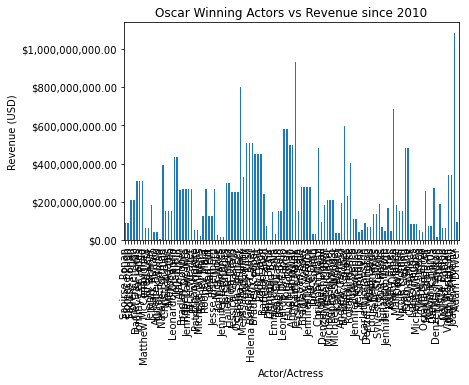

In [63]:
bar_chart = just_actors2.plot.bar(x='name', y='Adjusted Worldwide', legend = None)
plt.xticks(rotation = 'vertical')
plt.ylabel('Revenue (USD)')
plt.xlabel("Actor/Actress")
plt.title("Oscar Winning Actors vs Revenue since 2010")
bar_chart.yaxis.set_major_formatter('${x:1,.2f}')
plt.savefig('oscar_winning_actors.png', format = 'png', bbox_inches='tight')
plt.show()

In [64]:
noms=film_ct.loc[film_ct['nominees'] >0,:]
multinoms=film_ct.loc[film_ct['nominees'] >1,:]
winners=film_ct.loc[film_ct['winner_ct'] >0,:]
multiwin=film_ct.loc[film_ct['winner_ct'] >1,:]
losers=film_ct.loc[film_ct['nominees'] == 0,:]


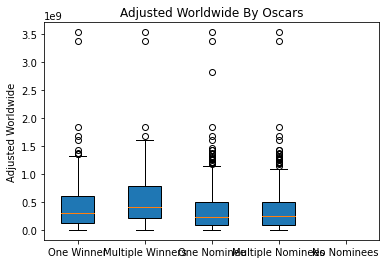

<Figure size 432x288 with 0 Axes>

In [65]:
#First set variables for plot, calling on filtered groups above
datasets=[winners["Adjusted Worldwide"], multiwin["Adjusted Worldwide"], noms["Adjusted Worldwide"], multinoms["Adjusted Worldwide"],losers["Adjusted Worldwide"]]
labels = ['One Winner','Multiple Winners', 'One Nominee', 'Multiple Nominees', 'No Nominees']
#red_diamond = dict(markerfacecolor='r', marker='D'), flierprops=red_diamond

#Plot it

fig1, ax1 = plt.subplots()
ax1.boxplot(datasets, labels=labels, patch_artist=True)
           

#label it
ax1.set_title('Adjusted Worldwide By Oscars')
ax1.set_ylabel('Adjusted Worldwide')
#ax1.yaxis.grid(True)
plt.show()
plt.savefig("Boxplot.png", bbox_inches='tight')

The r-squared is: 0.4643349837574874


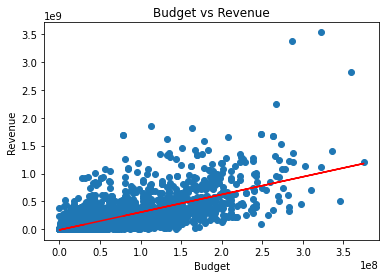

<Figure size 432x288 with 0 Axes>

In [66]:
x_values = movies_df['Adjusted Budget']
y_values = movies_df['Adjusted Worldwide']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(1,8), fontsize=15,color="red")
plt.xlabel('Budget')
plt.title('Budget vs Revenue')
plt.ylabel('Revenue')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("regression.png", bbox_inches='tight')